In [1]:
# TIME SERIES DATA ANALYSIS.

# **REQUIRED LIBRARIES:-**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **IMPORTING THE TIME SERIES DATA ABOUT AIR LINES :-**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers (1).csv


In [4]:
df=pd.read_csv('AirPassengers.csv')
df.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [5]:
#checking for null values:-
df.isnull().sum()

,0
Month,0
#Passengers,0


In [6]:
# checking for duplicate values:-
df.duplicated().sum()

0

In [7]:
# checking the info of the dataset:-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df['Month']=pd.to_datetime(df['Month']) # converting the dtypes

In [9]:
df.index=df['Month'] # Setting the month column to the index.

In [10]:
df.drop(columns='Month',inplace=True)

In [11]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# **Visualize the primary data condition:-**

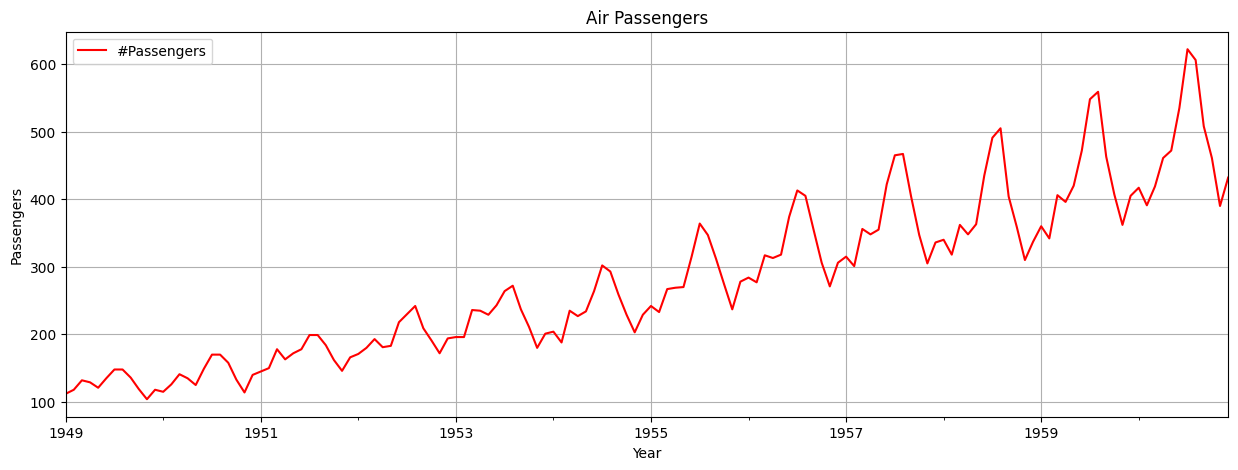

In [12]:
df.plot(figsize=(15,5),label='Passengers',color='r')
plt.title('Air Passengers')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# **Decomposition of the series:-**

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_multiplicative = seasonal_decompose(df,model='multiplicative',period=12)
df_trend=decomposition_multiplicative.trend
df_seasonal=decomposition_multiplicative.seasonal
df_residual=decomposition_multiplicative.resid

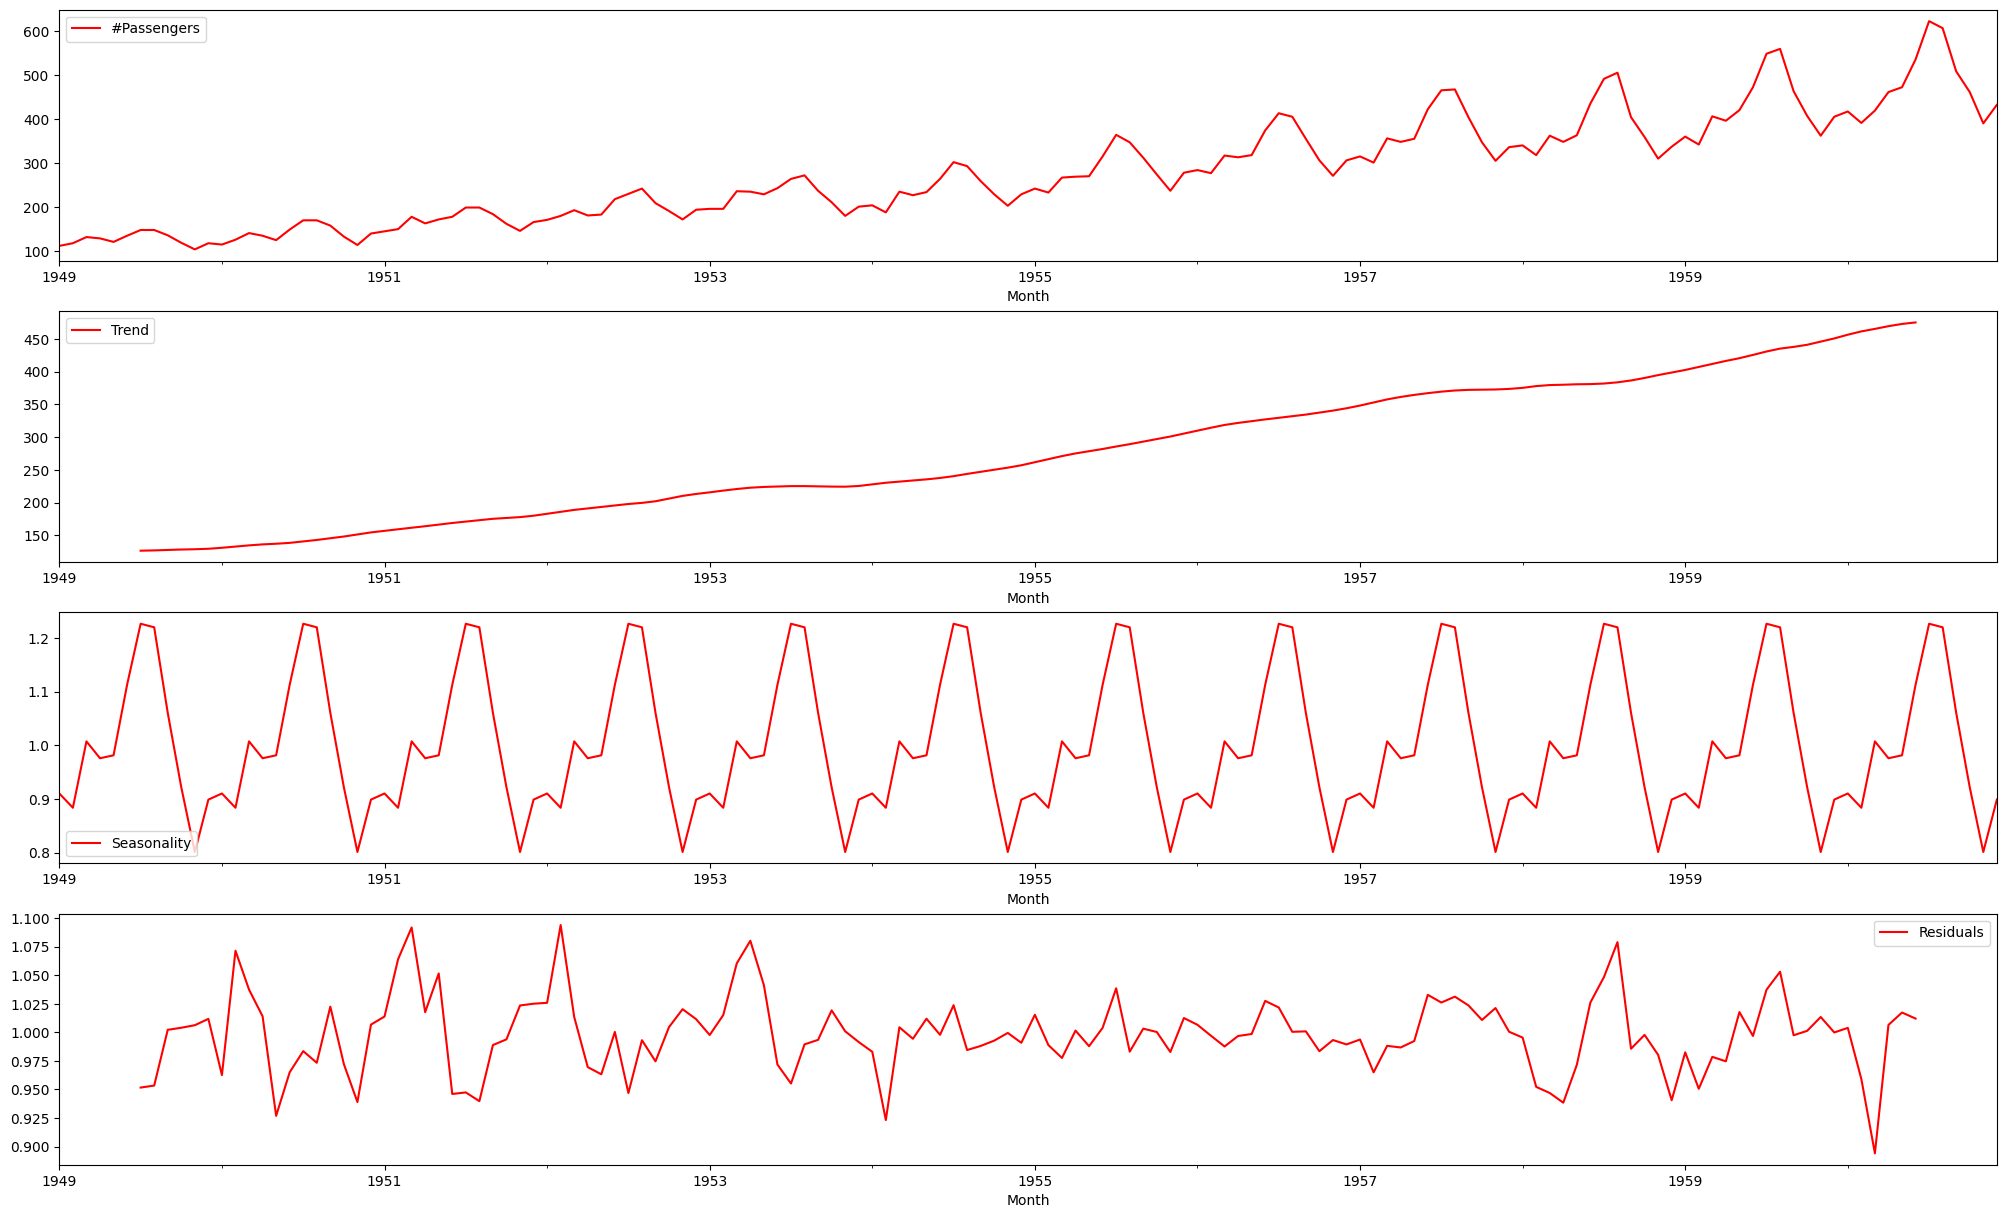

In [14]:
plt.figure(figsize=(25,15))
ax1=plt.subplot(4,1,1)
df.plot(ax=ax1,label='Original',color='r')
plt.legend(loc='best')
ax2=plt.subplot(412)
df_trend.plot(ax=ax2,label='Trend',color='r')
plt.legend(loc='best')
ax3=plt.subplot(413)
df_seasonal.plot(ax=ax3,label='Seasonality',color='r')
plt.legend(loc='best')
ax4=plt.subplot(414)
df_residual.plot(ax=ax4,label='Residuals',color='r')
plt.legend(loc='best')
plt.show()

## **Stationarity of the data:-**

In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [16]:
def adf_test(series):
  result=adfuller(series)
  print("Adfuller result:",result[0])
  print("p-value:",result[1])

def kpss_test(series):
  result=kpss(series,regression='ct') #If the series has a visible trend, try "ct".
                                     #If it fluctuates around a horizontal line, try "c".
  print("KPSS result:",result[0])
  print("p-value:",result[1])

# CHECKING STATIONARITY USING ADFULLER:-

In [17]:
adf_test(df) #if p val < 0.05 then the Data is stationary.

Adfuller result: 0.8153688792060498
p-value: 0.991880243437641


# CHECKING STATIONARY USING KPSS TEST:-

In [18]:
kpss_test(df)

KPSS result: 0.09614984853532407
p-value: 0.1


<ipython-input-16-785011082a98>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result=kpss(series,regression='ct') #If the series has a visible trend, try "ct".


# **Making the data stationarity:-**

# REDUCTION OF TREND AND SEASONALITY:-

#USING DIFFERENCING:-

In [19]:
df_differencing=df.diff()
df_differencing

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [20]:
df_differencing.dropna(inplace=True)

In [21]:
adf_test(df_differencing)

Adfuller result: -2.8292668241700047
p-value: 0.05421329028382478


In [22]:
kpss_test(df_differencing)

KPSS result: 0.024129891634650676
p-value: 0.1


<ipython-input-16-785011082a98>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result=kpss(series,regression='ct') #If the series has a visible trend, try "ct".


# Double Differencing:-

In [23]:
df_ddifferencing=df_differencing.diff()
df_ddifferencing

,#Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


In [24]:
#not applicable in this case.

# using Transformation:-

In [25]:
import numpy as np


# Log transformation
df_log = np.log(df)

# Square root transformation
df_sqrt = np.sqrt(df)


In [26]:
adf_test(df_log)

Adfuller result: -1.7170170891069683
p-value: 0.4223667747703874


In [27]:
adf_test(df_sqrt)

Adfuller result: -0.3458537677156893
p-value: 0.9187543217618346


# Transformation wont work well for the particular timeseries as there is less variation.

# D-Trending:-

In [28]:
df_dtrended=df.rolling(window=12).mean()

In [29]:
df_dtrended.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [30]:
final_df=df-df_dtrended
final_df.dropna(inplace=True)

In [31]:
adf_test(final_df)

Adfuller result: -3.164968129955144
p-value: 0.022104139473878875


## Finally we achive seasonality

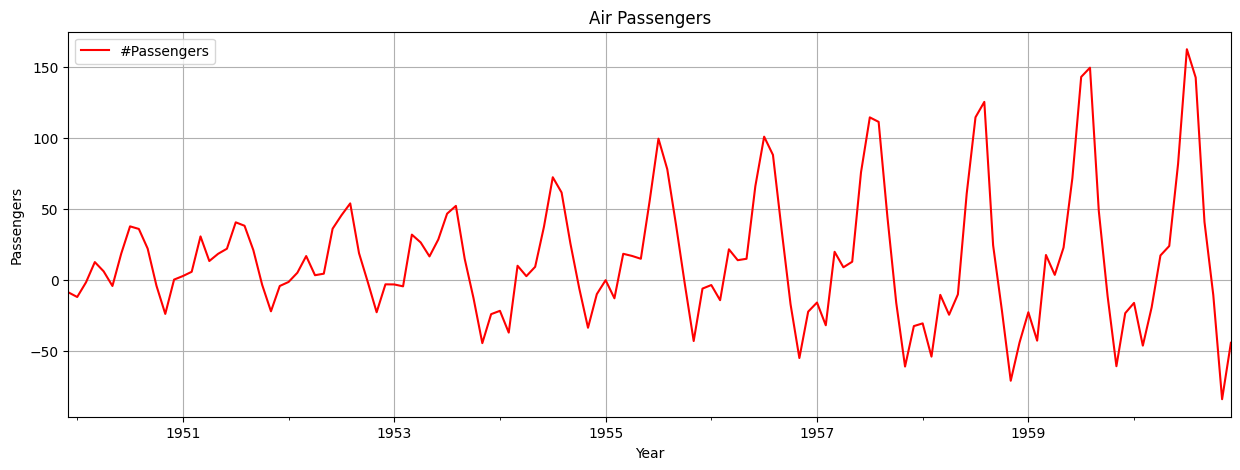

In [32]:
final_df.plot(figsize=(15,5),label='Passengers',color='r')
plt.title('Air Passengers')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend(loc='best')
plt.grid(True)

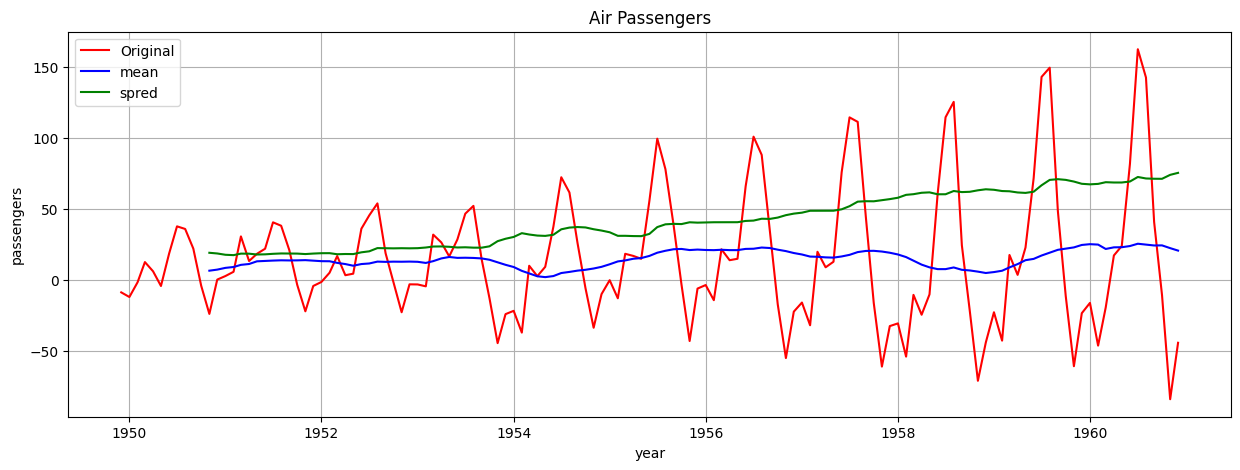

In [33]:
m=final_df.rolling(window=12).mean()
s=final_df.rolling(window=12).std()
plt.figure(figsize=(15,5))
plt.title('Air Passengers')
plt.plot(final_df,color='r',label='Original')
plt.plot(m,color='b',label='mean')
plt.plot(s,color='g',label='spred')
plt.legend(loc='best')
plt.xlabel('year')
plt.ylabel('passengers')
plt.grid(True)
plt.show()

# **Weak Stationary**

## **Forecasting model creation:-**

# FIRST TRY WITH RANDOM MODEL SUCH AS 'ARIMA'.

In [34]:
from statsmodels.tsa.arima.model import ARIMA

In [35]:
train=final_df[:120]
test=final_df[120:]

In [36]:
train

,#Passengers
Month,
1949-12-01,-8.666667
1950-01-01,-11.916667
1950-02-01,-1.583333
1950-03-01,12.666667
1950-04-01,6.166667
...,...
1959-07-01,143.083333
1959-08-01,149.583333
1959-09-01,48.666667


In [37]:
test

,#Passengers
Month,
1959-12-01,-23.333333
1960-01-01,-16.083333
1960-02-01,-46.166667
1960-03-01,-19.250000
1960-04-01,17.333333
1960-05-01,24.000000
1960-06-01,81.750000
1960-07-01,162.583333
1960-08-01,142.666667


In [38]:
model=ARIMA(train,order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [39]:
forecasted=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [40]:
final_df['predicted']=forecasted
final_df

,#Passengers,predicted
Month,,
1949-12-01,-8.666667,NaN
1950-01-01,-11.916667,NaN
1950-02-01,-1.583333,NaN
1950-03-01,12.666667,NaN
1950-04-01,6.166667,NaN
...,...,...
1960-08-01,142.666667,-71.680655
1960-09-01,40.916667,-71.625306
1960-10-01,-10.583333,-71.654637


<Axes: xlabel='Month'>

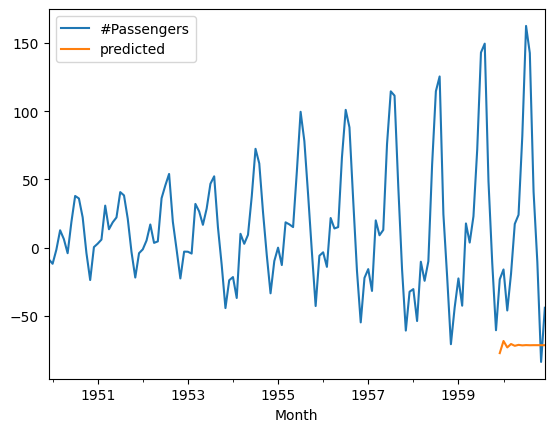

In [41]:
final_df.plot()

# VERY MUCH POOR PREDICTION WITH THE ARIMA MODEL AND RANDOM P,D,E VALUE.

## WE HAVE SOMETHING VERY MUCH INTERESTING CONCEPT CALLED:-'aUTO-aRIMA'.
# WHICH CAN PREDICT OR TELL THE BEST MODEL WHICH WILL FIT BEST FOR THE DATA
# WITH THE P,D,E VALUE.

In [42]:
#!pip install numpy==1.23.5 scipy==1.10.1
#1.run the above code
#2.then restart the session
#3.comment the above code
#4.run all the cells

In [43]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.2 MB/s eta 0:00:00


In [44]:
from pmdarima import auto_arima

In [46]:
auto = auto_arima(final_df['#Passengers'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [47]:
auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  133
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -612.905
Date:                Wed, 14 May 2025   AIC                           1239.810
Time:                        13:57:38   BIC                           1260.043
Sample:                    12-01-1949   HQIC                          1248.032
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.8579      1.701      4.033      0.000       3.525      10.191
ar.L1          0.8625      0.171      5.045      0.000       0.527       1.198
ar.L2          0.2071      0.236      0.878      0.380      -0.255       0.670
ar.L3         -0.5239      0.142     -3.683      0.000      -0.803      -0.245
ma.L1          0.0684      0.138      0.496      0.620      -0.202       0.338
ma.L2         -0.7564      0.091     -8.293      0.000      -0.935      -0.578
sigma2       577.4777     71.847      8.038      0.000     436.660     718.295
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 8.11
Prob(Q):                              0.89   Prob(JB):                         0.02
Heteroskedasticity (H):               6.21   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
#imorting sarimax model:-
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
model = SARIMAX(train,order=(3,0,3),seasonal_order=(3,0,2,12))
model_fit=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
model_predict=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [52]:
final_df['predicted']=model_predict
final_df

,#Passengers,predicted
Month,,
1949-12-01,-8.666667,NaN
1950-01-01,-11.916667,NaN
1950-02-01,-1.583333,NaN
1950-03-01,12.666667,NaN
1950-04-01,6.166667,NaN
...,...,...
1960-08-01,142.666667,141.166658
1960-09-01,40.916667,38.740718
1960-10-01,-10.583333,-16.815254


<Axes: xlabel='Month'>

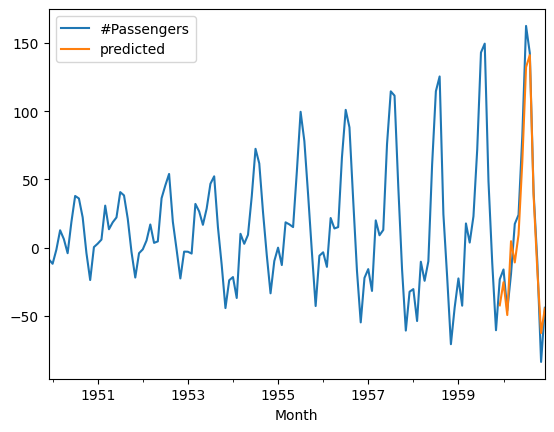

In [53]:
final_df.plot()

# MODEL PREDICTS CORRECT SOWE CAN CONTINUE OUR PREDICTON EITH THIS MODEL

In [54]:
forecast=model_fit.get_forecast(steps=48) # 12+36
prediction=forecast.predicted_mean

In [55]:
prediction

,predicted_mean
1959-12-01,-42.406845
1960-01-01,-25.430961
1960-02-01,-49.524428
1960-03-01,4.640817
1960-04-01,-10.938888
1960-05-01,9.444271
1960-06-01,62.932495
1960-07-01,132.379152
1960-08-01,141.166658
1960-09-01,38.740718


<Axes: xlabel='Month'>

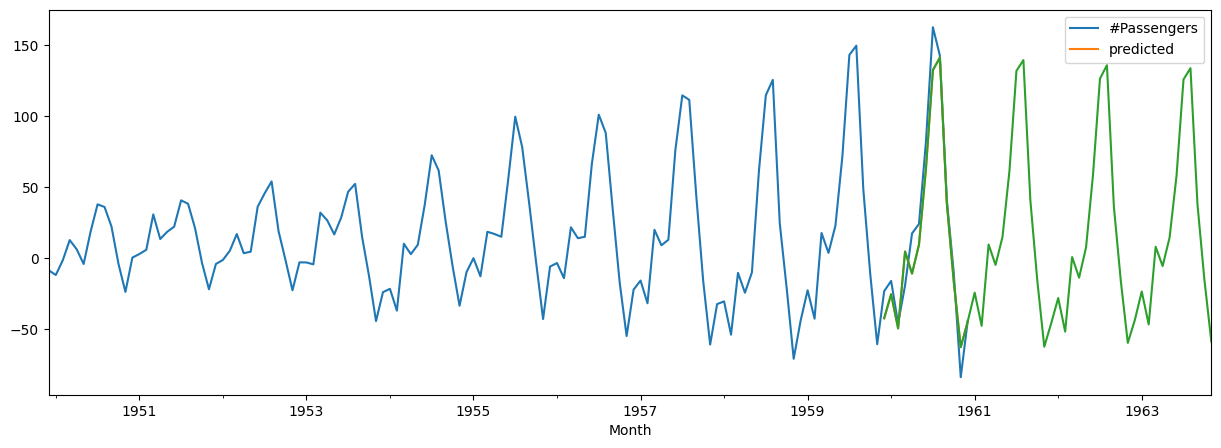

In [57]:
final_df.plot(figsize=(15,5))
prediction.plot(figsize=(15,5))

#  IT CAN BE SEEN THAT THE MODEL IS ALSO GIVING NEAR TO ACCURATE PREDICTION.